# Google_Play_Store_Data_Analysis


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# First Import the data 

df=pd.read_csv("C:/Users/Rahul/Desktop/New folder (2)/P-1/playstore_analysis.csv")

In [147]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.shape

(10841, 13)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df_1=df.dropna(subset=['Rating'])

In [12]:
df_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [13]:
df_1["Android Ver"].isnull().sum()

3

In [14]:
df_1[df_1.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
df_1[df_1["App"]==("Life Made WI-Fi Touchscreen Photo Frame")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df_2=df_1.drop(index=10472)

In [212]:
df_2[df_2["App"]==("Life Made WI-Fi Touchscreen Photo Frame")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [226]:
df_2[df_2.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df_2["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up'], dtype=object)

In [19]:
list_1=[3.0,4.2,1.5,4.0,4.0]

In [20]:
import statistics
print(statistics.mode(list_1))

4.0


In [21]:
df_2["Android Ver"].fillna(statistics.mode(list_1),inplace=True)


In [22]:
df_2[df_2.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [23]:
#C. Current ver – replace with most common value
df_2["Current Ver"].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
5.4.2                    1
2.3.09                   1
23.17                    1
2.15.180                 1
1.10.0.205086730         1
Name: Current Ver, Length: 2638, dtype: int64

In [24]:
df_2["Current Ver"].fillna("Varies with device ",inplace=True)

In [25]:
df_2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2.          Data clean up – correcting the data types

In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [27]:
df_2['Reviews'] = df_2['Reviews'].astype(int)
df_2['Size'] = df_2['Size'].astype(int)
df_2['Last Updated'] = df_2['Last Updated'].astype('datetime64[ns]')

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   object        
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 951.2+ KB


In [29]:
#Price variable – remove $ sign and convert to float
df_2['Price'] = df_2['Price'].str.replace('$','')

<ipython-input-29-e7fba4704b07>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2['Price'] = df_2['Price'].str.replace('$','')


In [30]:
df_2['Price'] = df_2['Price'].astype(float)

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 951.2+ KB


In [32]:
df_2.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [33]:
df_2["Installs"]=df_2["Installs"].str.replace(',','')

In [34]:
df_2["Installs"]=df_2["Installs"].str.replace('+','')

<ipython-input-34-a52d0d7f8de2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2["Installs"]=df_2["Installs"].str.replace('+','')


In [35]:
df_2["Installs"]=df_2["Installs"].astype(int)

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 914.6+ KB


In [ ]:
d. Convert all other identified columns to numeric

# 3. Sanity checks – check for the following and handle accordingl

In [ ]:
#a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [37]:
pd.unique(df_2[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [38]:
#b. Reviews should not be more than installs as only those who installed can review the app
df_3 = pd.DataFrame()
df_3 = df_2[df_2.Reviews <= df_2.Installs]

In [39]:
df_3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


4. Identify and handle outliers –

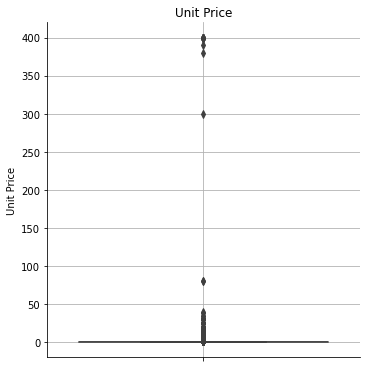

In [40]:
#i. Make suitable plot to identify outliers in price

sns.catplot(y="Price",data=df_3,kind="box")
plt.ylabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these case

In [41]:
df_3[df_3["Price"]==200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


iii. After dropping the useless records, make the suitable plot again to identify 
outliers 

In [42]:
useful_data=df_2[df_2["Price"]!=0]
useful_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up


In [43]:
useful_data.shape

(647, 13)

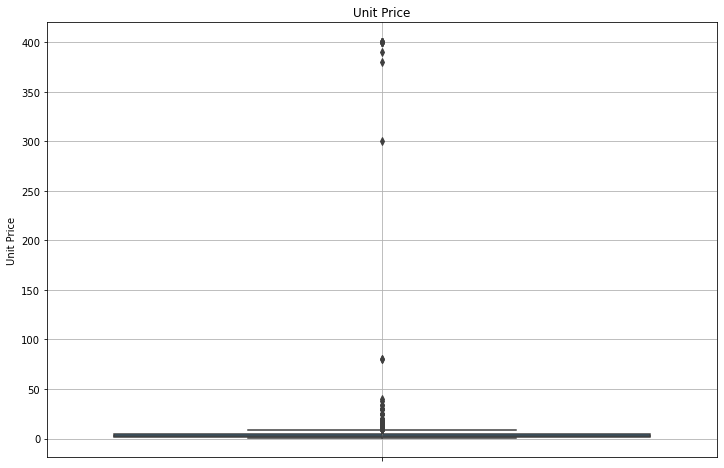

In [44]:
plt.subplots(figsize=(12,8))
sns.boxplot(y=useful_data.Price)

plt.ylabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [45]:
limit_data=df_2[df_2["Price"]<30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [46]:
limit_data.shape

(9345, 13)

# b. Reviews column


i. Make suitable plot

In [47]:
review_df=df_2.groupby('Category')['Reviews'].sum().sort_values()
review_df.sort_values(ascending=False)

Category
GAME                   1585419577
COMMUNICATION           815461799
SOCIAL                  621241091
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12881769
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585622
AUTO_AND_VEHICLES         1163630
LIBRA

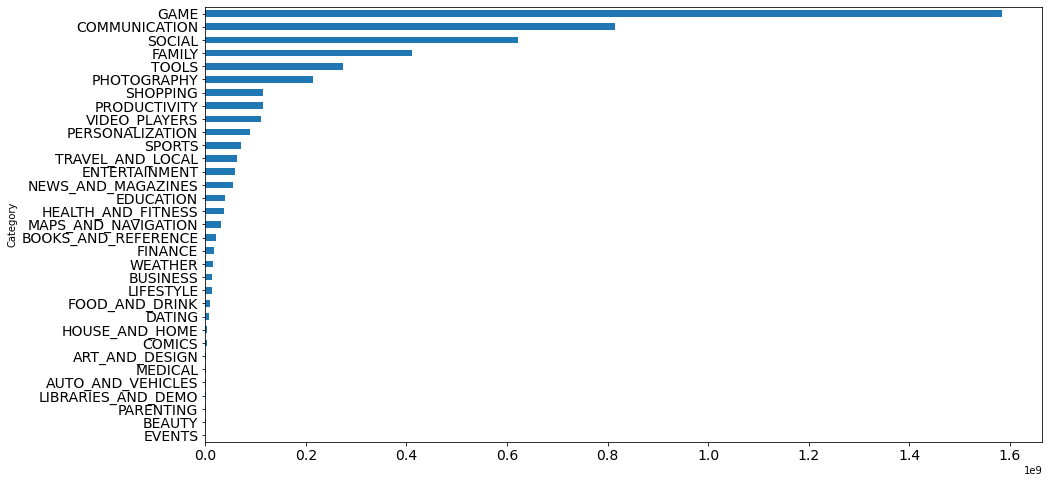

In [48]:
plt.subplots(figsize=(15,8))
review_df.plot(kind='barh', fontsize=14)
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [49]:
limit_data_by_review = df_2[df_2['Reviews'] < 1000000]
limit_data_by_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [50]:
limit_data_by_review.shape

(8662, 13)

# c. Installs


#i. What is the 95th percentile of the installs?

In [51]:
percentile_df= df_2.Installs.quantile(0.95) 
print(percentile_df)

100000000.0


ii. Drop records having a value more than the 95th percentile

In [52]:
drop_value=df_2.Installs.quantile() > percentile_df
drop_value

False

# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
values?

In [2]:
plt.subplots(figsize=(10,))
sns.distplot(df_2['Rating'])
plt.show()

NameError: name 'plt' is not defined

# 6. What are the top Content Rating values?

b. What is the implication of this on your analysis?

In [54]:
df_2["Content Rating"].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [55]:
Adult_rating = df_2[df_2['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df_2[df_2['Content Rating'] == 'Unrated'].index.to_list()
df_2.drop(Adult_rating, inplace = True)
df_2.drop(unrated, inplace = True)
df_2['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# 7. Effect of size on rating


a. Make a joinplot to understand the effect of size on rating

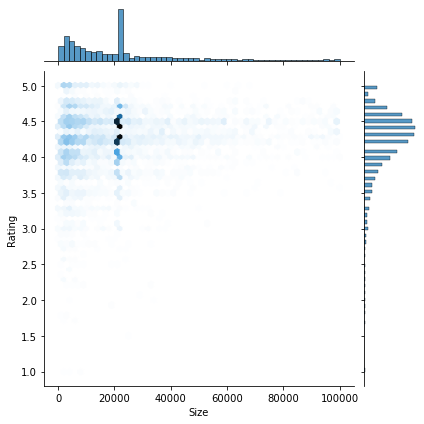

In [82]:
sns.jointplot(x=df_2['Size'],y=df_2['Rating'],data=df_2,kind='hex')
plt.show()

In [ ]:
#b. Do you see any patterns?

In [ ]:
#c. How do you explain the pattern?

# 8. Effect of price on rating

a. Make a jointplot (with regression line)

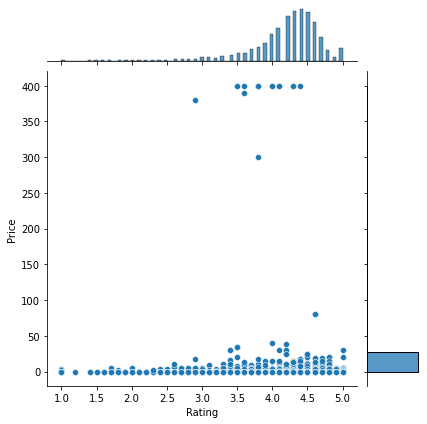

In [62]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df_2)
plt.show()

b. What pattern do you see?c. How do you explain the pattern?
 ans: As price increasing then rating is also increases.

d. Replot the data, this time with only records with price > 0

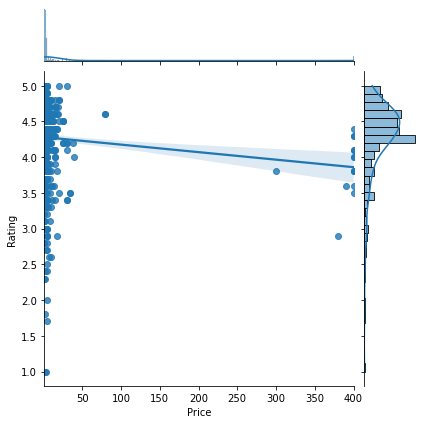

In [63]:
Price_greaterthan_zero = df_2[df_2['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

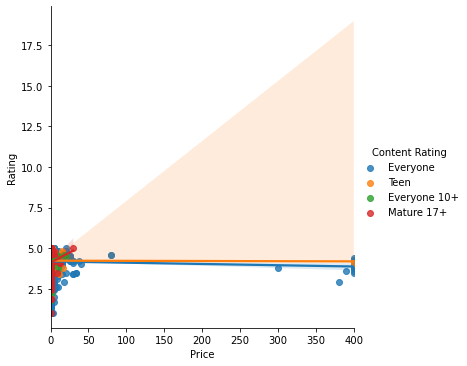

In [65]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df_2)
plt.show()

f. What is your overall inference on the effect of price on the rating

# 9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'b

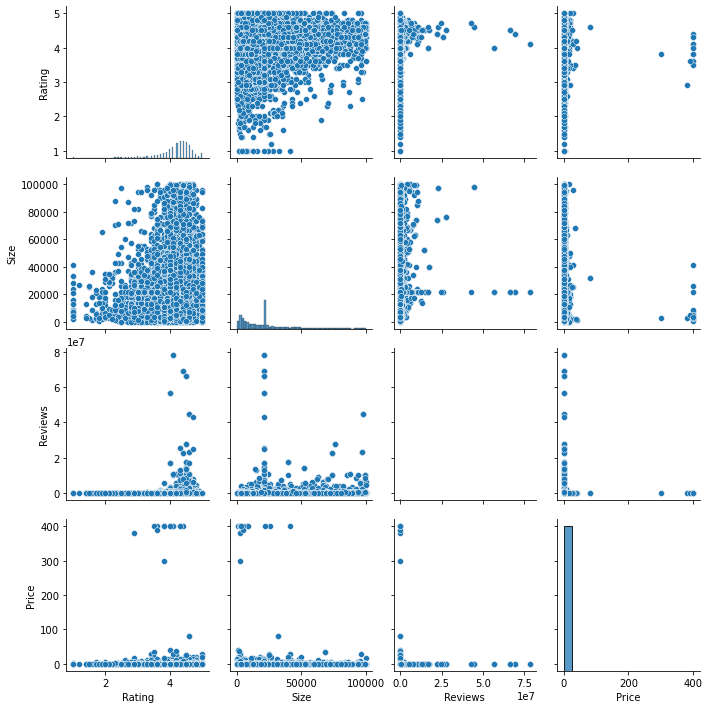

In [67]:
sns.pairplot(df_2,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

# 10. Rating vs. content rating

In [ ]:
a. Make a bar plot displaying the rating for each content rating

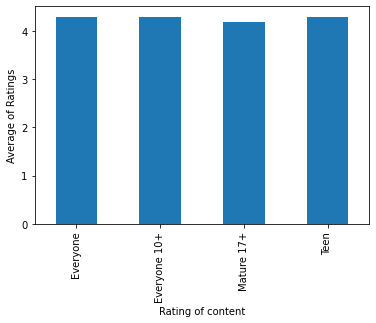

In [68]:
a = df_2['Rating'].groupby(df_2['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?:Mean

c. Choose the right metric and plot

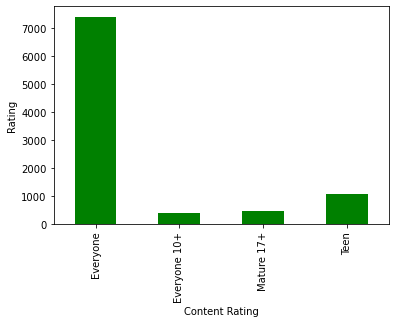

In [85]:
df_2.groupby(['Content Rating'])['Rating'].count().plot.bar(color="g")
plt.ylabel('Rating')
plt.show()

11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


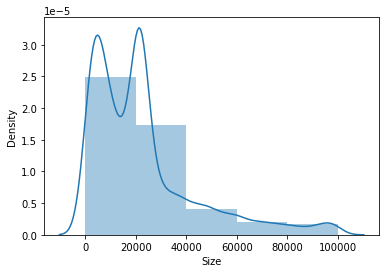

In [70]:
sns.distplot(df_2["Size"], bins=5)
plt.show()

In [71]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df_2['Size_Buckets'] = pd.cut(df_2['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df_2, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.232323
LOW,4.161853,4.207143,4.129592,4.209655
MED,4.243761,4.262602,4.091975,4.205630
HIGH,4.180212,4.209375,4.168333,4.213158
VERY HIGH,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [72]:
df_2.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [73]:
df_2.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this

In [ ]:
i. Annotated

In [74]:
Size_Buckets =pd.pivot_table(df_2, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


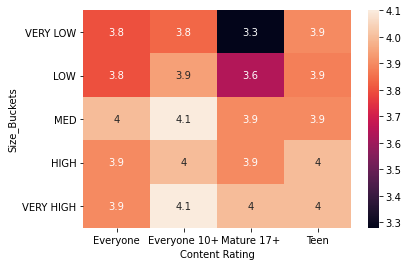

In [75]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

ii. Greens color map

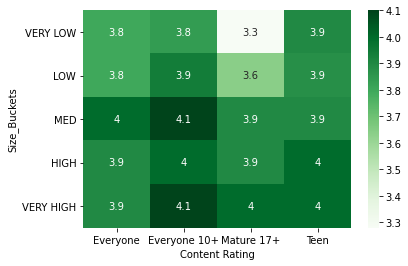

In [76]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()